In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

ww_columns = ['Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols' , 'Proanthocyanins', 'Hue', 'class_label']
ww_data = pd.read_csv('/content/gdrive/MyDrive/White_wineQuality.csv', names=ww_columns)


Mounted at /content/gdrive/


In [54]:
ww_data.head()

,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Hue,class_label
0,0.28319,0.28082,0.04,0.054795,0.106840,0.225350,0.088339,0.46442,0.46457,0.13772,1
1,0.19469,0.34932,0.07,0.082192,0.128550,0.140850,0.134280,0.38371,0.57480,0.13174,1
2,0.30088,0.20548,0.17,0.075342,0.101840,0.070423,0.042403,0.52311,0.43307,0.16766,1
3,0.30088,0.20548,0.17,0.075342,0.101840,0.070423,0.042403,0.52311,0.43307,0.16766,1
4,0.24779,0.34247,0.05,0.068493,0.093489,0.323940,0.127210,0.44241,0.53543,0.14371,1


In [55]:
ww_data.describe()

,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Hue,class_label
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329172,0.279329,0.270976,0.112247,0.125987,0.209506,0.142996,0.489853,0.449695,0.196496,0.534709
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138461,0.121565,0.101501,0.498950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221240,0.184930,0.090000,0.068493,0.096828,0.084507,0.056537,0.405720,0.370080,0.131740,0.000000
50%,0.292040,0.273970,0.260000,0.089041,0.111850,0.183100,0.113070,0.490100,0.448820,0.173650,1.000000
75%,0.407080,0.356160,0.420000,0.116440,0.130220,0.281690,0.197880,0.569700,0.519690,0.239520,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
ww_x =  ww_data.drop('class_label', axis=1).to_numpy()
ww_y = ww_data.to_numpy()[:, -1].reshape(-1,1)
print(ww_x.shape)
print(ww_y.shape)

(1599, 10)
(1599, 1)


In [57]:
ww_feature_names = ww_data.columns[:-1]
ww_feature_number = len(ww_feature_names)
ww_features = ww_data.iloc[:,0:-1]
ww_data_cl_number = len(ww_data)



In [58]:
# check duplicate in rows
ww_data.duplicated().sum()
print("is duplicate:",ww_data.duplicated().sum())

# check null input in rows
print("is null:",ww_data.isnull().values.any())

print("maxmium values",ww_data.max(axis=0))
print("minimum values",ww_data.min(axis=0))


is duplicate: 244
is null: False
maxmium values Alcohol                 1.0
Malic acid              1.0
Ash                     1.0
Alkalinity of ash       1.0
Magnesium               1.0
Total phenols           1.0
Flavanoids              1.0
Nonflavanoid phenols    1.0
Proanthocyanins         1.0
Hue                     1.0
class_label             1.0
dtype: float64
minimum values Alcohol                 0.0
Malic acid              0.0
Ash                     0.0
Alkalinity of ash       0.0
Magnesium               0.0
Total phenols           0.0
Flavanoids              0.0
Nonflavanoid phenols    0.0
Proanthocyanins         0.0
Hue                     0.0
class_label             0.0
dtype: float64


1    855
0    744
Name: class_label, dtype: int64


Text(0.5, 0, 'Class Label')

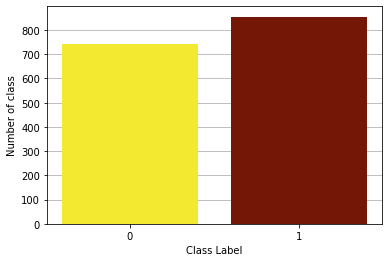

In [59]:
# distribution of class 0 and class 1
label_counts = ww_data["class_label"].value_counts()
print(label_counts)
unique_labels = ww_data["class_label"].unique()

fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(unique_labels, label_counts, zorder=2, color=['#751706', '#f2e930'])
ax.set_xticks([1,0])
ax.set_xticklabels(unique_labels)
ax.set_ylabel("Number of class")
ax.set_xlabel("Class Label")


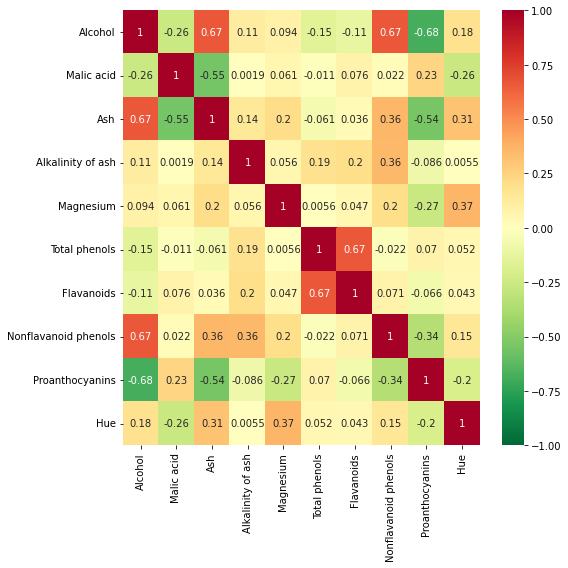

In [60]:
# correlation between features
ww_corr = ww_features.corr() 
plt.figure(figsize=(8,8)) 
sns.heatmap(ww_corr, cmap='RdYlGn_r', annot=True, vmin=-1, vmax=1) 
plt.show()

Text(0, 0.5, 'Standard Deviation')

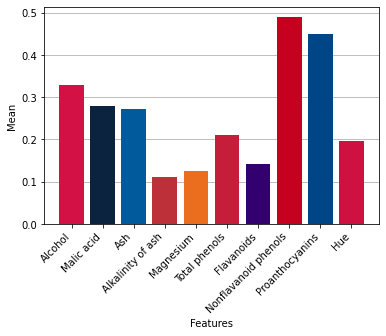

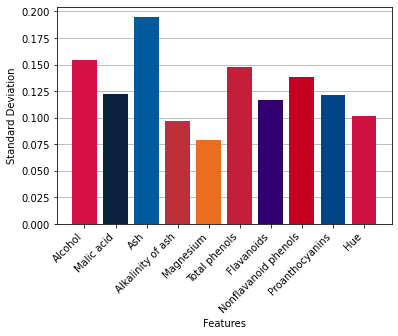

In [61]:

# Compute mean of each feature
means = ww_features.mean()

# Compute standard deviation of each feature
std = ww_features.std()

ww_colors = ['#D31145', '#0C2340', '#005A9C', '#BD3039', '#EB6E1F', '#C41E3A', '#33006F', '#C6011F', '#004687', '#CE1141']
# Plot mean and standard deviation of each attribute
fig, ax = plt.subplots()

ax.grid(zorder=1, axis="y")
ax.bar(ww_feature_names, means, zorder=2, color=ww_colors)
plt.xticks(rotation=45,ha='right')
ax.set_xlabel("Features")
ax.set_ylabel("Mean")


fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(ww_feature_names, std, zorder=2, color=ww_colors)
ax.set_xlabel("Features")
plt.xticks(rotation=45,ha='right')
ax.set_ylabel("Standard Deviation")

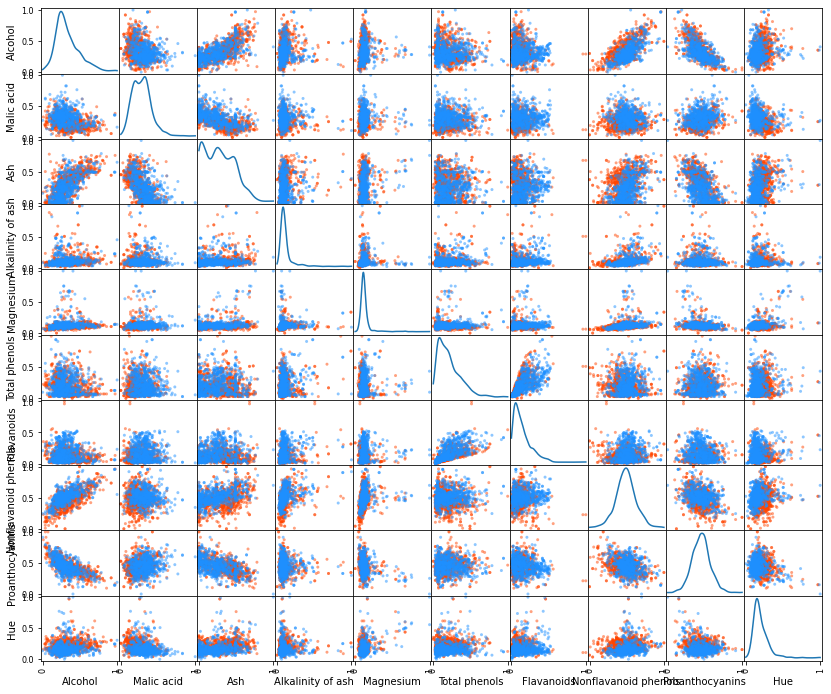

In [62]:
# correlation between features
color = ['dodgerblue', 'orangered']
colors = ww_data['class_label'].map(lambda x: color[x])
pd.plotting.scatter_matrix(ww_features, figsize= (14, 12), diagonal='kde', color=colors);

In [63]:
ww_ndata = ww_data.to_numpy()
print(np.min(ww_ndata))
print(np.max(ww_ndata))

0.0
1.0


Index(['Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Hue'],
      dtype='object')
[0.07840397 0.12771454 0.07784699 0.06800892 0.09293432 0.06424689
 0.12183957 0.12987766 0.07837451 0.16075263]


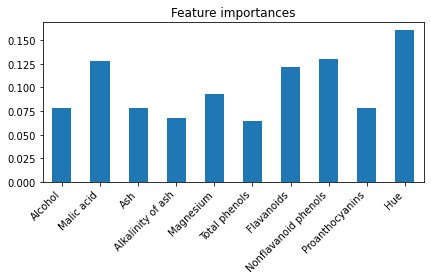

In [68]:
from sklearn.ensemble import RandomForestClassifier

feature_names = ww_data.columns[:-1]
print(feature_names)
y = ww_data.to_numpy()[:, -1]
forest = RandomForestClassifier(random_state=0)
forest.fit(ww_features, y)

importances = forest.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
#forest_importances.sort_values(ascending=False).plot.bar(ax=ax)
plt.xticks(rotation=45,ha='right')
ax.set_title("Feature importances")
fig.tight_layout()

Index(['Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Hue'],
      dtype='object')


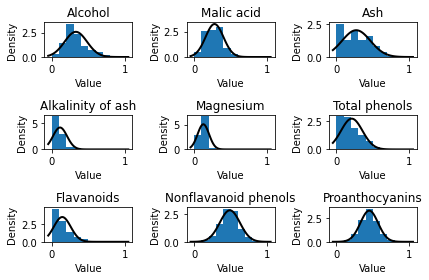

In [65]:
from scipy.stats import norm

def draw_distributon_graph(x_features,names):
  kd_normal_fig, axis = plt.subplots(3, 3)
  col = 0

  for x, ax in enumerate(axis.ravel()):
      ax.hist(x_features.loc[:, names[col]], density=True)
      mu, std = norm.fit(x_features.loc[:, names[col]])
      xmin, xmax = ax.get_xlim()
      x = np.linspace(xmin, xmax, 100)
      p = norm.pdf(x, mu, std)
      ax.plot(x, p, 'k', linewidth=2)
      ax.set_title(names[col])
      ax.set_xlabel("Value")
      ax.set_ylabel("Density")
      col += 1
  kd_normal_fig.tight_layout()

print(ww_feature_names)
draw_distributon_graph(ww_features,ww_feature_names)


In [66]:
#impelementation of RFE
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X = ww_features
y =  ww_data.to_numpy()[:, -1]
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=9, step=1)
selector = selector.fit(X, y)
print(selector.support_)

print(selector.ranking_)

estimator2 = SVR(kernel="linear")
selector2 = RFECV(estimator2, step=1, cv=5,min_features_to_select = 9)
selector2 = selector.fit(X, y)
print('2',selector2.support_)

print('2',selector2.ranking_)

[ True  True False  True  True  True  True  True  True  True]
[1 1 2 1 1 1 1 1 1 1]
2 [ True  True False  True  True  True  True  True  True  True]
2 [1 1 2 1 1 1 1 1 1 1]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Malic acid',
 'Flavanoids',
 'Hue',
 'Nonflavanoid phenols',
 'Magnesium',
 'Proanthocyanins',
 'Ash',
 'Alkalinity of ash',
 'Alcohol',
 'Total phenols']

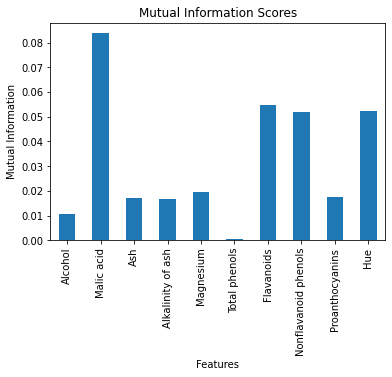

In [67]:
#plot mutual information
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np

def plot_mutual_information(X, y, feature_names):
    np.random.seed(4)
    mi_scores = mutual_info_classif(X, y)
    mi_scores_series = pd.Series(mi_scores, index=feature_names)
    mi_scores_series.plot(kind='bar')
    plt.title('Mutual Information Scores')
    plt.xlabel('Features')
    plt.ylabel('Mutual Information')
    return mi_scores_series.sort_values(ascending=False).index.tolist()


plot_mutual_information(ww_x,ww_y,ww_columns[:-1])
